In [1]:
import argparse
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import torch

In [3]:
# optimization progress: result of each iteration and best results
# to compare optimizations with the same initial dataset but different beta values
DATA_DEST1 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5.csv"
DATA_DEST2 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5_2.csv"
DATA_DEST3 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5_3.csv"
DATA_DEST4 = "./../saved_data/simulation_log_YbEr_UV_logEmission_beta=5_4.csv"



df1 = pd.read_csv(DATA_DEST1)
df2 = pd.read_csv(DATA_DEST2)
df3 = pd.read_csv(DATA_DEST3)
df4 = pd.read_csv(DATA_DEST4)

def get_MaxSoFar(df):
    evalued = len(df)
    max_ems = []
    for i in range(evalued):
        max_ems.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_ems)) 
    return x, max_ems

DATA_DEST11 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_0.csv"
DATA_DEST22 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_1.csv"
DATA_DEST33 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_2.csv"
DATA_DEST44 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_3.csv"



df11 = pd.read_csv(DATA_DEST11)
df22 = pd.read_csv(DATA_DEST22)
df33 = pd.read_csv(DATA_DEST33)
df44 = pd.read_csv(DATA_DEST44)


In [4]:
import statistics

plt.rcParams["font.family"] = "arial"
def stupid_stderr(x_list, y_list):
    mydict = {}
    for x, y in sorted(zip(x_list, y_list), key=lambda pair: pair[0]):
        if x not in mydict:
            mydict[x] = [y]
        else:
            mydict[x].append(y)
    xs = []
    ys = []
    std = []
    for key, value in mydict.items():
        xs.append(key)
        ys.append(sum(value) / len(value))
        std.append(statistics.pstdev(value)/len(value))
    return np.array(xs), np.array(ys), np.array(std)
def stupid_stddev(x_list, y_list):
    mydict = {}
    for x, y in sorted(zip(x_list, y_list), key=lambda pair: pair[0]):
        if x not in mydict:
            mydict[x] = [y]
        else:
            mydict[x].append(y)
    xs = []
    ys = []
    std = []
    for key, value in mydict.items():
        xs.append(key)
        ys.append(sum(value) / len(value))
        std.append(statistics.pstdev(value))
    return np.array(xs), np.array(ys), np.array(std)
def plot_optimization_std(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].UV.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, std = stupid_stddev(log_step,log_result)
    return step, mean, std
def plot_optimization_stderr(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].UV.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, stderr = stupid_stderr(log_step,log_result)
    return step, mean, stderr

def plot_optimization_std_VIS(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].VIS.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, std = stupid_stddev(log_step,log_result)
    return step, mean, std
def plot_optimization_stderr_VIS(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].VIS.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, stderr = stupid_stderr(log_step,log_result)
    return step, mean, stderr

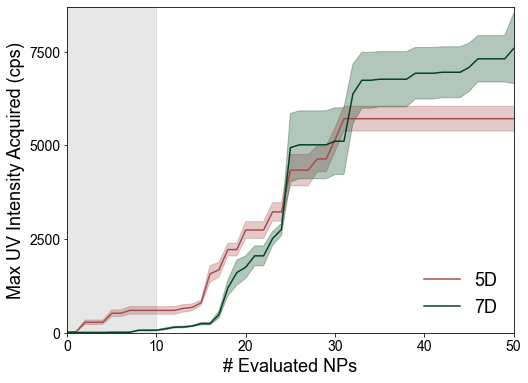

In [5]:
plt.rcParams["font.family"] = "arial"

c1 = '#a94c4c'
c2 = '#014421'
D5_list = [df1,df2,df3,df4]
D7_list = [df11,df22,df33,df44]

FontSize = 18
ticksize = 14
fig, ax1 = plt.subplots(figsize=(8,6))

x,y,stderr = plot_optimization_stderr(D5_list)
plt.plot(x,y,c=c1,label='5D')
plt.fill_between(x, y-stderr, y+stderr, color=c1,alpha=0.3)

x2,y2,stderr2 = plot_optimization_stderr(D7_list)
plt.plot(x2,y2,c=c2,label='7D')
plt.fill_between(x2, y2-stderr2, y2+stderr2, color=c2,alpha=0.3)


plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('Max UV Intensity Acquired (cps)', fontsize = FontSize)
plt.xlim([0,50])
plt.ylim([0,8700])
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
# plt.savefig('YbEr_opt_progress.eps') 
plt.legend(loc='lower right', fontsize = FontSize,frameon=False)
plt.savefig('SI_5Dvs7D.pdf') 

In [6]:
x,y,std = plot_optimization_std(D5_list)


x2,y2,std2 = plot_optimization_std(D7_list)


start = 9
end = 31
print('5D')
print(f'UV step {start}: {y[start]}+/-{std[start]}')
print(f'UV step {end}: {y[end]}+/-{std[end]}')
print(f'UV ratio = {y[end]/y[start]}')
print(f'UV diff = {y[end]-y[start]}\n')

print('7D')
print(f'UV step {start}: {y2[start]}+/-{std2[start]}')
print(f'UV step {end}: {y2[end]}+/-{std2[end]}')
print(f'UV ratio = {y2[end]/y2[start]}')
print(f'UV diff = {y2[end]-y2[start]}\n')

5D
UV step 9: 597.9160330000001+/-406.9945812040417
UV step 31: 5710.93650075+/-1322.073599940186
UV ratio = 9.551402179492985
UV diff = 5113.02046775

7D
UV step 9: 67.1872205+/-48.487650570812285
UV step 31: 5110.9365225+/-3562.7886162450677
UV ratio = 76.07006934451174
UV diff = 5043.749302



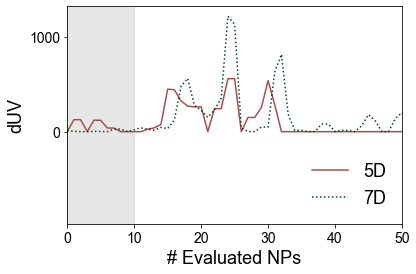

In [7]:
dx = x[1]-x[0]
dydx = np.gradient(y, dx)
dy2dx2 = np.gradient(y2,dx)

plt.plot(x,dydx,c=c1,label='5D')
plt.plot(x2,dy2dx2,c=c2,linestyle='dotted',label='7D')
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('dUV', fontsize = FontSize)
plt.xlim([0,50])
#plt.ylim([0,8700])
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
# plt.savefig('YbEr_opt_progress.eps') 
plt.legend(loc='lower right', fontsize = FontSize,frameon=False)